# SVM

## Prepocessing data

In [1]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn import linear_model
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
from sklearn import svm
import matplotlib.pyplot as plt 

In [2]:
df1 = pd.read_csv("data\student-por.csv",sep=";") #read file from different directory

In [3]:
#Splitting the data accordingly
X = df1.iloc[:, :30]
y = 0.3 * df1.iloc[:, 30] + 0.3 * df1.iloc[:, 31] + 0.4 * df1.iloc[:, 32]
X.dropna()
y.dropna()

0       7.7
1      10.4
2      12.3
3      14.0
4      12.4
       ... 
644    10.3
645    15.4
646    10.5
647    10.0
648    10.7
Length: 649, dtype: float64

In [4]:
def fixingfile(X):
    switch = {0: ("GP", "MS"), 1: ("F", "M"), 3: ("U", "R"), 4: ("LE3", "GT3"), 5:("T", "A"), 15:("yes","no"), 16:("yes","no"),
             17:("yes","no"), 18:("yes","no"), 19:("yes","no"), 20:("yes","no"), 21:("yes","no"), 22:("yes","no")}
    for column in range(len(X.columns)):
        if column not in switch:
            continue
        for i in range(len(X.iloc[:,column])):
           #print(X.iloc[i, column] == "U",X.iloc[i, column], switch[column])
            if X.iloc[i,column] == switch[column][0]:
                #print(X.iloc[i, column], switch[column][0])
                X.iloc[i,column] = 1
            elif X.iloc[i, column] == switch[column][1]:
                X.iloc[i,column] = 0
    X.drop(["Mjob", "Fjob", "reason", "guardian"], axis = 1, inplace=True) #Remove the ones with more than 1 and 0 answers
    print(X.shape) #Checking the shape of the features
    
    return X

In [5]:
X_fixed = fixingfile(X)
#X_fixed.to_csv("portfix.csv") 
y = np.array(y) #changed to array to be easier to work with
X = np.array(X_fixed)


(649, 26)


In [6]:
y = y>=10

In [7]:
X_scale = StandardScaler()
X = np.array(X_scale.fit_transform(X))

In [8]:
#Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
y_train = y_train.flatten() #Make the array 1d
y_test = y_test.flatten()

## All the code of Linear, RBF, and Polynomial were taken from hw5

## Linear kernel

In [9]:
acc_train_svm_linear = []

In [10]:
acc_test_svm_linear = []

In [11]:
c_svm_linear = []

In [12]:
def svm_linear(c):
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    
    svc_linear.fit(X_train, y_train)
    
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    #Find the prediction and accuracy on the test set
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_linear.append(c)

In [13]:
# Call the above function i.e. svm_linear with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for c in cVals:
    svm_linear(c)

Train Accuracy = 0.753213
Test Accuracy = 0.765385
Train Accuracy = 0.753213
Test Accuracy = 0.765385
Train Accuracy = 0.807198
Test Accuracy = 0.815385
Train Accuracy = 0.838046
Test Accuracy = 0.838462
Train Accuracy = 0.848329
Test Accuracy = 0.823077
Train Accuracy = 0.848329
Test Accuracy = 0.823077
Train Accuracy = 0.848329
Test Accuracy = 0.823077


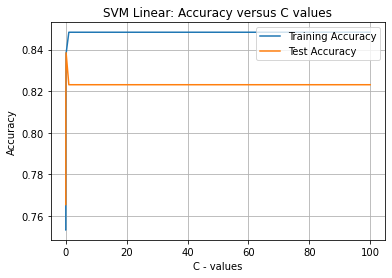

In [14]:
plt.grid()
plt.plot(c_svm_linear, acc_train_svm_linear)
plt.plot(c_svm_linear, acc_test_svm_linear)
plt.xlabel("C - values")
plt.ylabel("Accuracy")
plt.title("SVM Linear: Accuracy versus C values")

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

## Radial Basis Function(RBF) Kernel

In [15]:
acc_train_svm_rbf = []

In [16]:
acc_test_svm_rbf = []

In [17]:
c_svm_rbf = []

In [18]:
def svm_rbf(c):
    # Create an object of svm.SVC(probability = False, kernel = 'rbf', C = c) 
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c) 
    
    # Fit the classifier on the training set 
    svc_rbf.fit(X_train, y_train)
    
    # Find the prediction and accuracy on the training set 
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    acc_train = np.mean(Yhat_svc_rbf_train == y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_rbf.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set 
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    acc_test = np.mean(Yhat_svc_rbf_test == y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_rbf.append(c)

In [19]:
for c in cVals:
    svm_rbf(c)

Train Accuracy = 0.753213
Test Accuracy = 0.765385
Train Accuracy = 0.753213
Test Accuracy = 0.765385
Train Accuracy = 0.753213
Test Accuracy = 0.765385
Train Accuracy = 0.753213
Test Accuracy = 0.765385
Train Accuracy = 0.928021
Test Accuracy = 0.826923
Train Accuracy = 1.000000
Test Accuracy = 0.788462
Train Accuracy = 1.000000
Test Accuracy = 0.792308


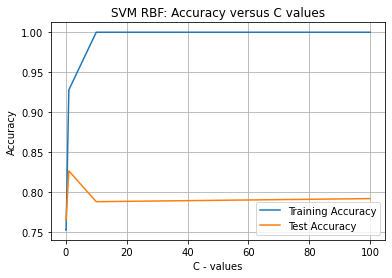

In [20]:
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.grid()
plt.plot(c_svm_rbf, acc_train_svm_rbf)
plt.plot(c_svm_rbf, acc_test_svm_rbf)
plt.xlabel("C - values")
plt.ylabel("Accuracy")
plt.title("SVM RBF: Accuracy versus C values")
# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

## Polynomial

In [21]:
acc_train_svm_poly = []

In [22]:
acc_test_svm_poly = []

In [23]:
c_svm_poly = []

In [24]:
def svm_polynomial(c):
    # Create an object of svm.SVC(probability = False, kernel = 'poly', C = c) - 5 points
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    A = X_train[0:300,:]  # First 300 rows of training set.
    B = y_train[0:300]  
    C = X_test[0:100,:]   # First 100 rows of test set.
    D = y_test[0:100]
    
    # Fit the classifier on the training set - 5 points
    # Use A and B to train and C and D to test.
    svc_polynomial.fit(A, B)
    
    # Find the prediction and accuracy on the training set - 5 points
    Yhat_svc_poly_train = svc_polynomial.predict(A)
    acc_train = np.mean(Yhat_svc_poly_train == B)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_poly.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set - 5 points
    Yhat_svc_poly_test = svc_polynomial.predict(C)
    acc_test = np.mean(Yhat_svc_poly_test == D)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_poly.append(c)

In [25]:
cVals = np.geomspace(0.000001, 0.001, 5, 10)
for c in cVals:
    svm_polynomial(c)

Train Accuracy = 0.746667
Test Accuracy = 0.770000
Train Accuracy = 0.746667
Test Accuracy = 0.770000
Train Accuracy = 0.746667
Test Accuracy = 0.770000
Train Accuracy = 0.746667
Test Accuracy = 0.770000
Train Accuracy = 0.746667
Test Accuracy = 0.770000


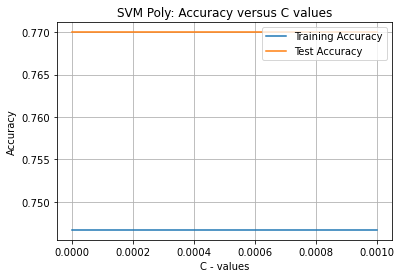

In [26]:
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.grid()
plt.plot(c_svm_poly, acc_train_svm_poly)
plt.plot(c_svm_poly, acc_test_svm_poly)
plt.xlabel("C - values")
plt.ylabel("Accuracy")
plt.title("SVM Poly: Accuracy versus C values")
# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Code beyond this point is to make the table of results for svm
## Do not run the cell multiple times

In [27]:
acc_train_lin = np.array(acc_train_svm_linear).reshape(len(acc_train_svm_linear), 1)
acc_test_lin = np.array(acc_test_svm_linear).reshape(len(acc_test_svm_linear),1)
all_accuracy = np.hstack((acc_train_lin, acc_test_lin))

In [28]:
acc_train_rbf = np.array(acc_train_svm_rbf).reshape(len(acc_train_svm_rbf),1)
acc_test_rbf = np.array(acc_test_svm_rbf).reshape(len(acc_test_svm_rbf),1)
acc_rbf = np.hstack((acc_train_rbf, acc_test_rbf))
all_accuracy = np.hstack((all_accuracy, acc_rbf))
print(all_accuracy)

[[0.75321337 0.76538462 0.75321337 0.76538462]
 [0.75321337 0.76538462 0.75321337 0.76538462]
 [0.80719794 0.81538462 0.75321337 0.76538462]
 [0.83804627 0.83846154 0.75321337 0.76538462]
 [0.84832905 0.82307692 0.92802057 0.82692308]
 [0.84832905 0.82307692 1.         0.78846154]
 [0.84832905 0.82307692 1.         0.79230769]]


In [29]:
acc_train_poly = np.array(acc_train_svm_poly).reshape(len(acc_train_svm_poly),1)
acc_test_poly = np.array(acc_test_svm_poly).reshape(len(acc_test_svm_poly),1)
acc_poly = np.hstack((acc_train_poly, acc_test_poly))
zeros = np.zeros((2,2))
acc_poly = np.vstack((acc_poly, zeros))
all_accuracy = np.hstack((all_accuracy, acc_poly))
print(all_accuracy)

[[0.75321337 0.76538462 0.75321337 0.76538462 0.74666667 0.77      ]
 [0.75321337 0.76538462 0.75321337 0.76538462 0.74666667 0.77      ]
 [0.80719794 0.81538462 0.75321337 0.76538462 0.74666667 0.77      ]
 [0.83804627 0.83846154 0.75321337 0.76538462 0.74666667 0.77      ]
 [0.84832905 0.82307692 0.92802057 0.82692308 0.74666667 0.77      ]
 [0.84832905 0.82307692 1.         0.78846154 0.         0.        ]
 [0.84832905 0.82307692 1.         0.79230769 0.         0.        ]]


In [30]:
column = np.array(['acc_train_lin', 'acc_test_lin', 'acc_train_rbf', 'acc_test_rbf', 'acc_train_poly', 'acc_test_poly'])
acc_table = pd.DataFrame(all_accuracy, columns = ['acc_train_lin', 'acc_test_lin', 'acc_train_rbf', 'acc_test_rbf', 'acc_train_poly', 'acc_test_poly'] )
print(acc_table)

   acc_train_lin  acc_test_lin  acc_train_rbf  acc_test_rbf  acc_train_poly  \
0       0.753213      0.765385       0.753213      0.765385        0.746667   
1       0.753213      0.765385       0.753213      0.765385        0.746667   
2       0.807198      0.815385       0.753213      0.765385        0.746667   
3       0.838046      0.838462       0.753213      0.765385        0.746667   
4       0.848329      0.823077       0.928021      0.826923        0.746667   
5       0.848329      0.823077       1.000000      0.788462        0.000000   
6       0.848329      0.823077       1.000000      0.792308        0.000000   

   acc_test_poly  
0           0.77  
1           0.77  
2           0.77  
3           0.77  
4           0.77  
5           0.00  
6           0.00  


In [31]:
#This cell only ran once to export a csv file
#acc_table.to_csv("svmtable.csv") 